In [1]:
import math
import numpy as np
import h5py
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.python.framework import ops
from tf_utils import load_dataset, random_mini_batches, convert_to_one_hot, predict

%matplotlib inline
np.random.seed(1)

In [2]:
tf.executing_eagerly()

True

In [3]:
"""Tensorflow 2.0 run eager execution 
"""
# tf.compat.v1.disable_eager_execution()
# Y_hat = tf.constant(23, name = "Y_hat", shape = (1, ))
# Y = tf.constant(32, name = "Y", shape = (1, ))
# loss = tf.Variable((Y - Y_hat) ** 2, name = "loss")
# init = tf.compat.v1.global_variables_initializer()
# with tf.compat.v1.Session() as sess:
#     sess.run(init)
#     print(sess.run(loss))
    
tf.compat.v1.reset_default_graph()

tf.keras.backend.clear_session()
    

In [4]:
Y_hat = tf.constant(23, name = "Y_hat")
tf.keras.backend.clear_session()
Y_hat

<tf.Tensor: shape=(), dtype=int32, numpy=23>

The key differences between `tf.Variable` and `tf.constant` in TensorFlow lie in their mutability and purpose:

**1. Mutability:**

- **tf.Variable:** **Mutable:** Its value can be changed after creation using methods like `assign` or through automatic updates during training. This makes them ideal for storing trainable parameters in neural networks.
- **tf.constant:** **Immutable:** Once created, its value cannot be changed. It's suitable for storing fixed values that won't change during the execution of your program.

**2. Purpose:**

- **tf.Variable:** Primarily used for **trainable parameters** in machine learning models like weights and biases in neural networks. These parameters are updated during the training process to learn patterns from the data.
- **tf.constant:** Used for **fixed values** that don't need to be modified during program execution. Examples include input data, hyperparameters, or constants like pi or the speed of light.

**3. Behavior in the Graph:**

- **tf.Variable:** Creates a **placeholder node** in the TensorFlow graph. This node holds a reference to the actual variable's value, which is stored separately. During training, updates to the variable are reflected in the graph through operations like `assign`.
- **tf.constant:** Creates a **constant node** in the graph that holds the actual value itself. This node's value is fixed and cannot be changed during the execution of the graph.

**4. Optimization:**

- **tf.Variable:** Plays a crucial role in **backpropagation** during training. Gradients are calculated with respect to `tf.Variable`s to update the weights and biases in neural networks.
- **tf.constant:** Does not participate in backpropagation since its value is fixed.

**Summary Table:**

| Feature        | tf.Variable                         | tf.constant                       |
|----------------|------------------------------------|-------------------------------------|
| Mutability      | **Mutable** (can be changed)             | **Immutable** (cannot be changed)     |
| Purpose         | Trainable parameters in models        | Fixed values in computations       |
| Graph behavior   | Placeholder node (reference)         | Constant node (holds actual value) |
| Optimization    | Used in backpropagation               | Not involved in backpropagation     |


In your project, use `tf.Variable` judiciously for parameters requiring training and avoid unnecessary usage to optimize memory allocation and execution speed. Use `tf.constant` for values that remain fixed throughout your program's execution.

In [5]:
"""You can do directly"""
Y_hat = tf.constant(23, name = "Y_hat")
Y = tf.constant(32, name = "Y")
loss = tf.Variable((Y - Y_hat) ** 2, name = "loss")
print(loss)


<tf.Variable 'loss:0' shape=() dtype=int32, numpy=81>


In [6]:
print(Y_hat)

tf.Tensor(23, shape=(), dtype=int32)


Writing and running programs in TensorFlow has the following steps:

1. Create Tensors (variables) that are not yet executed/evaluated.
2. Write operations between those Tensors.
3. Initialize your Tensors.
4. Create a Session.
5. Run the Session. This will run the operations you'd written above.

But tensorflow 2.0 supports egaer execution

In [7]:
a = tf.constant(2)
b = tf.constant(10)
c = tf.multiply(a, b)
print(c)
tf.keras.backend.clear_session()


tf.Tensor(20, shape=(), dtype=int32)


In [8]:
# Change the value of x in the feed_dict

# tf.compat.v1.disable_eager_execution()
# x = tf.compat.v1.placeholder(tf.int64, name = 'x')

# with tf.compat.v1.Session() as sess:
#     print(sess.run(x * 2, feed_dict = {x : 2}))
#     sess.close()
    

In [9]:
x = tf.constant(np.random.randn(4, 3), name = "X")
print(x)
tf.keras.backend.clear_session()

tf.Tensor(
[[ 1.62434536 -0.61175641 -0.52817175]
 [-1.07296862  0.86540763 -2.3015387 ]
 [ 1.74481176 -0.7612069   0.3190391 ]
 [-0.24937038  1.46210794 -2.06014071]], shape=(4, 3), dtype=float64)


Lets start this programming exercise by computing the following equation:  𝑌=𝑊𝑋+𝑏 , where  𝑊  and  𝑋  are random matrices and b is a random vector.

Exercise: Compute  𝑊𝑋+𝑏  where  𝑊,𝑋 , and  𝑏  are drawn from a random normal distribution. W is of shape (4, 3), X is (3,1) and b is (4,1). As an example, here is how you would define a constant X that has shape (3,1):

In [10]:
tf.keras.backend.clear_session()

In [11]:
# GRADED FUNCTION: linear_function

def linear_function():
    """
    Implements a linear function:
            Initializes W to be a random tensor of shape (4,3)
            Initializes X to be a random tensor of shape (3,1)
            Initializes b to be a random tensor of shape (4,1)
    Returns: 
    result -- runs the session for Y = WX + b 
    """
    
    W = tf.constant(np.random.randn(4, 3))
    X = tf.constant(np.random.randn(3, 1))
    b = tf.constant(np.random.randn(4, 1))
    Y = tf.add(tf.matmul(W, X), b)
    
    return Y


In [12]:
print( "result = " + str(linear_function()))

result = tf.Tensor(
[[-1.10296141]
 [-1.03295748]
 [ 0.30515231]
 [-0.33862392]], shape=(4, 1), dtype=float64)


In [13]:
# GRADED FUNCTION: sigmoid

def Sigmoid(z):
    """
    Computes the sigmoid of z

    Arguments:
    z -- input value, scalar or vector

    Returns:
    results -- the sigmoid of z
    """

    return tf.math.sigmoid(tf.constant(z, dtype = tf.float64, name = "z")).numpy()

In [14]:
print ("sigmoid(0) = ", Sigmoid(0))
print ("sigmoid(12) = " + str(Sigmoid(12)))

sigmoid(0) =  0.5
sigmoid(12) = 0.9999938558253978


In [15]:
# GRADED FUNCTION: cost

def cost(logits, labels):
    """
    Computes the cost using the sigmoid cross entropy
    
    Arguments:
    logits -- vector containing z, output of the last linear unit (before the final sigmoid activation)
    labels -- vector of labels y (1 or 0) 
    
    Note: What we've been calling "z" and "y" in this class are respectively called "logits" and "labels" 
    in the TensorFlow documentation. So logits will feed into z, and labels into y. 
    
    Returns:
    cost -- runs the session of the cost (formula (2))
    """
    
    return tf.nn.sigmoid_cross_entropy_with_logits(logits = tf.constant(logits, name = "logits", dtype = tf.float64), labels = tf.constant(labels, name = "labels", dtype = tf.float64)).numpy()
    

In [16]:
logits = Sigmoid(np.array([0.2,0.4,0.7,0.9]))
cost = cost(logits, np.array([0,0,1,1]))
print ("cost = " + str(cost))

cost = [1.00538722 1.03664083 0.41385432 0.39956614]


In [17]:
# GRADED FUNCTION: one_hot_matrix

def one_hot_matrix(labels, C):
    """
    Creates a matrix where the i-th row corresponds to the ith class number and the jth column
                     corresponds to the jth training example. So if example j had a label i. Then entry (i,j) 
                     will be 1. 
                      
    Arguments:
    labels -- vector containing the labels 
    C -- number of classes, the depth of the one hot dimension
    
    Returns: 
    one_hot -- one hot matrix
    """
    return tf.one_hot(tf.constant(labels, dtype = tf.int32), tf.constant(C, dtype = tf.int32))

In [18]:
labels = np.array([1,2,3,0,2,1])
one_hot = one_hot_matrix(labels, C = 4)
print ("one_hot = " + str(one_hot))

one_hot = tf.Tensor(
[[0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 1. 0. 0.]], shape=(6, 4), dtype=float32)


In [19]:
# GRADED FUNCTION: ones

def ones(shape):
    """
    Creates an array of ones of dimension shape
    
    Arguments:
    shape -- shape of the array you want to create
        
    Returns: 
    ones -- array containing only ones
    """
    
    return tf.ones(tf.constant(shape, dtype = tf.int32)).numpy()

In [20]:
print ("ones = " + str(ones([3])))

ones = [1. 1. 1.]


In [21]:
# Loading the dataset
X_train_orig, Y_train_orig, X_test_orig, Y_test_orig, classes = load_dataset()

y = 5


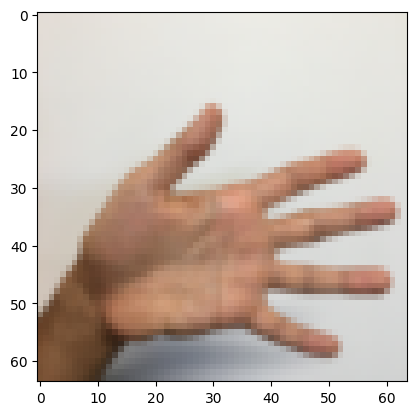

In [22]:
# Example of a picture
index = 0
plt.imshow(X_train_orig[index])
print ("y = " + str(np.squeeze(Y_train_orig[:, index])))

In [23]:
# Flatten the training and test images
X_train_flatten = X_train_orig.reshape(X_train_orig.shape[0], -1).T
X_test_flatten = X_test_orig.reshape(X_test_orig.shape[0], -1).T
# Normalize image vectors
X_train = X_train_flatten/255.
X_test = X_test_flatten/255.
# Convert training and test labels to one hot matrices
Y_train = convert_to_one_hot(Y_train_orig, 6)
Y_test = convert_to_one_hot(Y_test_orig, 6)

print ("number of training examples = " + str(X_train.shape[1]))
print ("number of test examples = " + str(X_test.shape[1]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))

number of training examples = 1080
number of test examples = 120
X_train shape: (12288, 1080)
Y_train shape: (6, 1080)
X_test shape: (12288, 120)
Y_test shape: (6, 120)


In [24]:
shape = (3,3)
initializer = tf.initializers.GlorotUniform()
var = tf.Variable(initializer(shape=shape))
var

<tf.Variable 'Variable:0' shape=(3, 3) dtype=float32, numpy=
array([[ 0.525599  ,  0.13712859,  0.5714648 ],
       [ 0.68643475, -0.5642214 , -0.12864947],
       [-0.53559923,  0.6122489 ,  0.10256004]], dtype=float32)>

In [25]:
# GRADED FUNCTION: initialize_parameters

def initialize_parameters():
    """
    Initializes parameters to build a neural network with tensorflow. The shapes are:
                        W1 : [25, 12288]
                        b1 : [25, 1]
                        W2 : [12, 25]
                        b2 : [12, 1]
                        W3 : [6, 12]
                        b3 : [6, 1]
    
    Returns:
    parameters -- a dictionary of tensors containing W1, b1, W2, b2, W3, b3
    """
    tf.random.set_seed(1)
    initializer = tf.initializers.GlorotNormal(seed=1)
    W1 = tf.Variable(initializer(shape = (25,12288)), trainable = True, dtype=tf.float32)
    b1 = tf.Variable(initializer(shape = (25,1)), trainable = True, dtype=tf.float32)
    W2 = tf.Variable(initializer(shape = (12,25)), trainable = True, dtype=tf.float32)
    b2 = tf.Variable(initializer(shape = (12,1)), trainable = True, dtype=tf.float32)
    W3 = tf.Variable(initializer(shape = (6,12)), trainable = True, dtype=tf.float32)
    b3 = tf.Variable(initializer(shape = (6,1)), trainable = True, dtype=tf.float32)

    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2,
                  "W3": W3,
                  "b3": b3}
    
    return parameters

In [26]:
parameters = initialize_parameters()
print("W1 = " + str(parameters["W1"]))
print("b1 = " + str(parameters["b1"]))
print("W2 = " + str(parameters["W2"]))
print("b2 = " + str(parameters["b2"]))

tf.keras.backend.clear_session()

W1 = <tf.Variable 'Variable:0' shape=(25, 12288) dtype=float32, numpy=
array([[ 0.00183502, -0.00714326,  0.00914525, ..., -0.01221176,
         0.01656458,  0.00526992],
       [ 0.02264025,  0.0067227 ,  0.00795862, ...,  0.00284724,
         0.01910819,  0.00122853],
       [-0.00163333, -0.00861273, -0.01398893, ..., -0.00741132,
         0.02071251, -0.026417  ],
       ...,
       [-0.00126929,  0.01729332,  0.02082342, ...,  0.01709594,
         0.00429358, -0.00733263],
       [ 0.00275988,  0.00419503,  0.00949959, ...,  0.01241149,
        -0.0270652 ,  0.01501104],
       [-0.00145541,  0.02459595,  0.00339064, ..., -0.02478788,
         0.02716016, -0.00306428]], dtype=float32)>
b1 = <tf.Variable 'Variable:0' shape=(25, 1) dtype=float32, numpy=
array([[ 0.03993344],
       [-0.15545043],
       [ 0.19901739],
       [-0.24872702],
       [-0.28688198],
       [-0.12585859],
       [-0.01201915],
       [ 0.14756493],
       [-0.00472601],
       [-0.44236282],
       [ 0.54

In [27]:
# GRADED FUNCTION: forward_propagation

def forward_propagation(X, parameters):
    """
    Implements the forward propagation for the model: LINEAR -> RELU -> LINEAR -> RELU -> LINEAR -> SOFTMAX
    
    Arguments:
    X -- input dataset placeholder, of shape (input size, number of examples)
    parameters -- python dictionary containing your parameters "W1", "b1", "W2", "b2", "W3", "b3"
                  the shapes are given in initialize_parameters

    Returns:
    Z3 -- the output of the last LINEAR unit
    """
    
    
    # Retrieve the parameters from the dictionary "parameters" 
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    W3 = parameters['W3']
    b3 = parameters['b3']
    
    ### START CODE HERE ### (approx. 5 lines)              # Numpy Equivalents:
    Z1 = tf.add(tf.matmul(W1,X),b1)                        # Z1 = np.dot(W1, X) + b1
    A1 = tf.nn.relu(Z1)                                    # A1 = relu(Z1)
    Z2 = tf.add(tf.matmul(W2,A1),b2)                       # Z2 = np.dot(W2, a1) + b2
    A2 = tf.nn.relu(Z2)                                    # A2 = relu(Z2)
    Z3 = tf.add(tf.matmul(W3,Z2),b3)                       # Z3 = np.dot(W3,Z2) + b3
    ### END CODE HERE ###
    
    return Z3

In [28]:
parameters = initialize_parameters()
Z3 = forward_propagation(X_train, parameters)
print("Z3 = " + str(Z3))

Z3 = tf.Tensor(
[[ 0.31374222  0.7606991   0.38721418 ...  0.48126855  0.5716481
   0.5039601 ]
 [ 0.45215803  0.09779096  0.26445144 ...  0.26757234  0.30503505
   0.3762372 ]
 [ 1.6638794   1.3688543   1.4704036  ...  1.4247197   1.3327775
   1.7511069 ]
 [-1.2653809  -0.8749666  -0.94326675 ... -1.0216074  -1.1434367
  -0.9625934 ]
 [ 0.5738419   0.24137753  0.40707517 ...  0.45794368  0.5317998
   0.41900015]
 [ 1.3672092   1.1985708   1.2424432  ...  1.4217482   1.3011042
   0.9124247 ]], shape=(6, 1080), dtype=float32)


In [29]:
# GRADED FUNCTION: compute_cost 

def compute_cost(Z3, Y):
    """
    Computes the cost
    
    Arguments:
    Z3 -- output of forward propagation (output of the last LINEAR unit), of shape (6, number of examples)
    Y -- "true" labels vector placeholder, same shape as Z3
    
    Returns:
    cost - Tensor of the cost function
    """
    
    # to fit the tensorflow requirement for tf.nn.softmax_cross_entropy_with_logits(...,...)
    logits = tf.transpose(Z3)
    labels = tf.transpose(Y)
    
    ### START CODE HERE ### (1 line of code)
    cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits = logits, labels = labels))
    ### END CODE HERE ###
    
    return cost

In [30]:
parameters = initialize_parameters()
Z3 = forward_propagation(X_train, parameters)
cost = compute_cost(Z3, Y_train)
print("cost = " + str(cost))

cost = tf.Tensor(2.0450943, shape=(), dtype=float32)


In [37]:
with tf.GradientTape() as tape:
    x = tf.constant(3.0)
    tape.watch(x)
    y = x * x

dy_dx = tape.gradient(y, x)
print(dy_dx)

tf.Tensor(6.0, shape=(), dtype=float32)


## Understanding `tf.GradientTape()` and its Use in Training Loops:

**1. Automatic Differentiation with `tf.GradientTape()`:**

- `tf.GradientTape()` is a powerful tool in TensorFlow for **automatic differentiation**. This involves efficiently computing the gradients of a computation with respect to its inputs.

**2. Working with `tf.GradientTape()**:

- **Context Manager:** It acts as a context manager, meaning you use it within a `with` block. Any operations performed inside the `with` block are recorded by the tape.
- **Recording Operations:** The tape tracks all mathematical operations performed on tensors within the `with` block. This includes functions like addition, multiplication, and activation functions.

**Example:**

```python
import tensorflow as tf

with tf.GradientTape() as tape:
  x = tf.constant([1.0, 2.0])
  y = x * x  # Operation recorded by the tape

# After the 'with' block, the tape contains the computation history
```

**3. Retrieving Gradients:**

- Once you've built the computational graph within the `with` block, you can use the `tape.gradient` method to calculate the gradients of any recorded output with respect to any input variable.

```python
# Calculate the gradient of y with respect to x
gradients = tape.gradient(y, x)
print(gradients)  # Output: [2. 4.]
```

**4. Application in Training Loops:**

**a. Forward Pass:**

- During training, the forward pass involves calculating the model's output (predictions) for a given input (features). You can use `tf.GradientTape()` to record the operations performed in the forward pass.

```python
with tf.GradientTape() as tape:
  # Forward pass operations using your model and input data
  predictions = model(data)
  loss = loss_function(predictions, labels)
```

**b. Backward Pass (Gradient Calculation):**

- After the forward pass, use the tape's `gradient` method to calculate the gradients of the loss function with respect to the trainable variables of the model (weights and biases). These gradients are crucial for updating the model's parameters in the direction that minimizes the loss.

```python
# Calculate gradients of loss w.r.t. trainable variables
gradients = tape.gradient(loss, model.trainable_variables)
```

**c. Optimizer Update:**

- You can use an optimizer (e.g., `tf.keras.optimizers.Adam`) to update the model's trainable variables based on the calculated gradients. This update aims to improve the model's performance by reducing the loss over multiple training iterations.

```python
optimizer.apply_gradients(zip(gradients, model.trainable_variables))
```

This process of forward pass, gradient calculation, and parameter update forms the core of backpropagation, which is the foundation of training deep neural networks.

**Overall, `tf.GradientTape()` simplifies automatic differentiation within TensorFlow, making it easier to build and train models by automatically tracking operations and calculating gradients.**

In [50]:
def model(X_train, Y_train, X_test, Y_test, learning_rate = 0.0001,
          num_epochs = 2500, minibatch_size = 32, print_cost = True):
    """
    Implements a three-layer tensorflow neural network: LINEAR->RELU->LINEAR->RELU->LINEAR->SOFTMAX.
    
    Arguments:
    X_train -- training set, of shape (input size = 12288, number of training examples = 1080)
    Y_train -- test set, of shape (output size = 6, number of training examples = 1080)
    X_test -- training set, of shape (input size = 12288, number of training examples = 120)
    Y_test -- test set, of shape (output size = 6, number of test examples = 120)
    learning_rate -- learning rate of the optimization
    num_epochs -- number of epochs of the optimization loop
    minibatch_size -- size of a minibatch
    print_cost -- True to print the cost every 100 epochs
    
    Returns:
    parameters -- parameters learnt by the model. They can then be used to predict.
    """
    
    ops.reset_default_graph()                         # to be able to rerun the model without overwriting tf variables
    tf.random.set_seed(1)                            # to keep consistent results
    seed = 3                                          # to keep consistent results
    (n_x, m) = X_train.shape                          # (n_x: input size, m : number of examples in the train set)
    n_y = Y_train.shape[0]                            # n_y : output size
    costs = []                                        # To keep track of the cost
    
    parameters = initialize_parameters()
    #print(parameters)
    
    optimizer = tf.optimizers.SGD(learning_rate=learning_rate, name='SGD')
    
    for epoch in range(num_epochs):

        epoch_cost = 0.                       # Defines a cost related to an epoch
        num_minibatches = int(m / minibatch_size) # number of minibatches of size minibatch_size in the train set
        seed = seed + 1
        minibatches = random_mini_batches(X_train, Y_train, minibatch_size, seed)

        for minibatch in minibatches:
            (minibatch_X, minibatch_Y) = minibatch
            
            with tf.GradientTape() as tape:
                ### In GradientTape we have to pass all the Operations and tape will records all those things
                Z3 = forward_propagation(minibatch_X, parameters)
                loss_value = compute_cost(Z3, minibatch_Y)
              
            # contains values of gradients of models weights like
            # {W1 : [W1 gradients values]}
            grads = tape.gradient(loss_value, [parameters])
            processed_grads = [value for key, value in grads[0].items()]
            processed_parameters = [value for key, value in parameters.items()]
            
            # We have to pass list of grads values along with parameters both are in list format
            optimizer.apply_gradients(zip(processed_grads, processed_parameters))
            epoch_cost += loss_value
        
        # Print the cost every epoch
        if print_cost == True and epoch % 100 == 0:
            print ("Cost after epoch %i: %f" % (epoch, epoch_cost))
        if print_cost == True and epoch % 5 == 0:
            costs.append(epoch_cost)

    # plot the cost
    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per tens)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()

    #lets save the parameters in a variable
#     parameters = sess.run(parameters)
#     print ("Parameters have been trained!")

    #Calculate the correct predictions
    #correct_prediction = tf.equal(tf.argmax(Z3), tf.argmax(Y))

    # Calculate accuracy on the test set
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))

    print ("Train Accuracy:", accuracy.eval({X: X_train, Y: Y_train}))
    print ("Test Accuracy:", accuracy.eval({X: X_test, Y: Y_test}))
        
    return parameters

In [51]:
parameters = model(X_train, Y_train, X_test, Y_test)

Cost after epoch 0: 65.573296
Cost after epoch 100: 50.508659
Cost after epoch 200: 43.745728
Cost after epoch 300: 38.652092
Cost after epoch 400: 34.612400
Cost after epoch 500: 31.407511


KeyboardInterrupt: 

In [ ]:
    W1 = tf.Variable(initializer(shape = (25,12288)), trainable = True, dtype=tf.float32)
    b1 = tf.Variable(initializer(shape = (25,1)), trainable = True, dtype=tf.float32)
    W2 = tf.Variable(initializer(shape = (12,25)), trainable = True, dtype=tf.float32)
    b2 = tf.Variable(initializer(shape = (12,1)), trainable = True, dtype=tf.float32)
    W3 = tf.Variable(initializer(shape = (6,12)), trainable = True, dtype=tf.float32)
    b3 = tf.Variable(initializer(shape = (6,1)), trainable = True, dtype=tf.float32)

In [ ]:
inputs = keras.Input(shape=(12288,), name="digits")
x1 = layers.Dense(25, activation="relu")(inputs)
x2 = layers.Dense(12, activation="relu")(x1)
x3 = layers.Dense(6, activation="relu")(x2)
outputs = layers.Dense(10, name="predictions")(x3)
model = keras.Model(inputs=inputs, outputs=outputs)

In [ ]:
# Instantiate an optimizer.
optimizer = keras.optimizers.SGD(learning_rate=1e-3)
# Instantiate a loss function.
loss_fn = keras.losses.SparseCategoricalCrossentropy(from_logits=True)

In [ ]:
epochs = 2
for epoch in range(epochs):
    print("\nStart of epoch %d" % (epoch,))

    # Iterate over the batches of the dataset.
    for step, (x_batch_train, y_batch_train) in enumerate(train_dataset):
        # Open a GradientTape to record the operations run
        # during the forward pass, which enables auto-differentiation.
        with tf.GradientTape() as tape:
            # Run the forward pass of the layer.
            # The operations that the layer applies
            # to its inputs are going to be recorded
            # on the GradientTape.
            logits = model(x_batch_train, training=True)  # Logits for this minibatch

            # Compute the loss value for this minibatch.
            loss_value = loss_fn(y_batch_train, logits)

        # Use the gradient tape to automatically retrieve
        # the gradients of the trainable variables with respect to the loss.
        grads = tape.gradient(loss_value, model.trainable_weights)

        # Run one step of gradient descent by updating
        # the value of the variables to minimize the loss.
        optimizer.apply_gradients(zip(grads, model.trainable_weights))

        # Log every 200 batches.
        if step % 200 == 0:
            print(
                "Training loss (for one batch) at step %d: %.4f"
                % (step, float(loss_value))
            )
            print("Seen so far: %s samples" % ((step + 1) * batch_size))

####
https://www.tensorflow.org/guide/keras/writing_a_training_loop_from_scratch